<a href="https://colab.research.google.com/github/sakshighugare/OIBSIP/blob/main/final_sale_prediction_project_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# project name : sale prediction by using python


# Importing the libraries

In [ ]:

#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import svm

# Dataset Loading

In [ ]:
# Load Dataset
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DF = pd.read_csv('/content/drive/MyDrive/oasis internship /Advertising.csv')

# Dataset First View

In [ ]:

DF.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
DF.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


# Data Preprocessing

In [ ]:
# Dataset Rows & Columns count
DF.shape

(200, 5)

# Dataset Information

In [ ]:
# Dataset Info
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
DF.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
# Columns
DF.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
DF =DF.drop('Unnamed: 0', axis = 1)

In [ ]:
DF.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
#check for duplicates
DF.duplicated().sum()

0

In [ ]:
# checking for null values
DF.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
#splitting the data into attributes(X) and target variables(Y)
X = DF.drop('Sales', axis=1)

In [ ]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
Y = DF[['Sales']]
Y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


# **(EDA)Exploratory data Analysis**

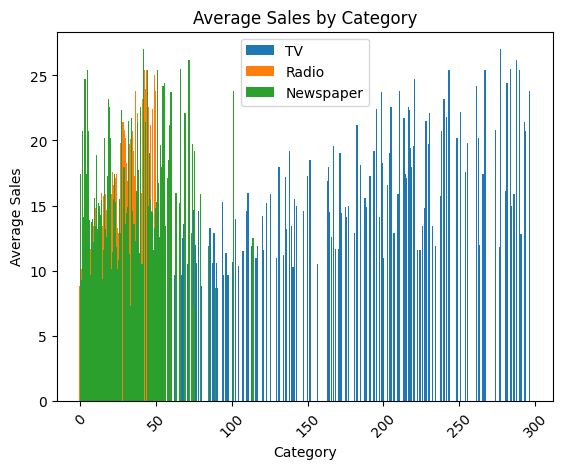

In [ ]:

# Columns to analyze
columns = ['TV', 'Radio', 'Newspaper']

# Create a bar chart for each column
for column in columns:
    grouped_sales = DF.groupby(column)['Sales'].mean()
    plt.bar(grouped_sales.index, grouped_sales.values, label=column)

# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Average Sales')
plt.title('Average Sales by Category')

# Add a legend
plt.legend()

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()


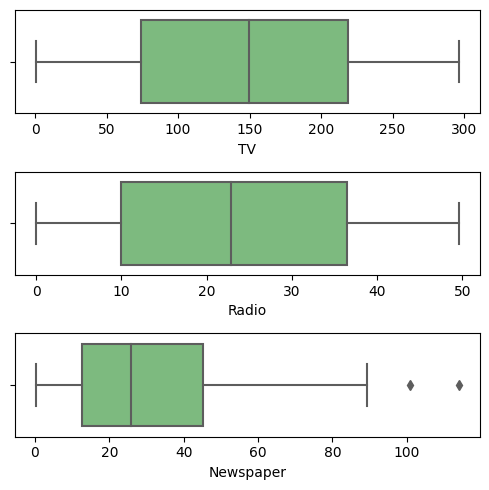

In [ ]:
fig,axs = plt.subplots(3,figsize=(5,5))
sns.boxplot(x=DF["TV"],ax = axs[0],palette='Greens')
sns.boxplot(x=DF["Radio"],ax = axs[1],palette='Greens')
sns.boxplot(x=DF["Newspaper"],ax = axs[2],palette='Greens')
plt.tight_layout()

<Axes: xlabel='Sales'>

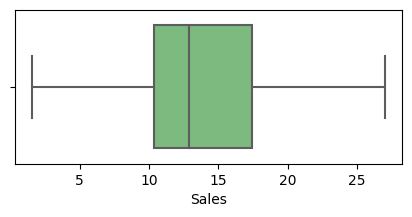

In [ ]:
fig,ax = plt.subplots(1,figsize=(5,2))
# fig,axs = plt.subplots(3,figsize=(5,5))
sns.boxplot(x= DF["Sales"],ax=ax,palette='Greens')

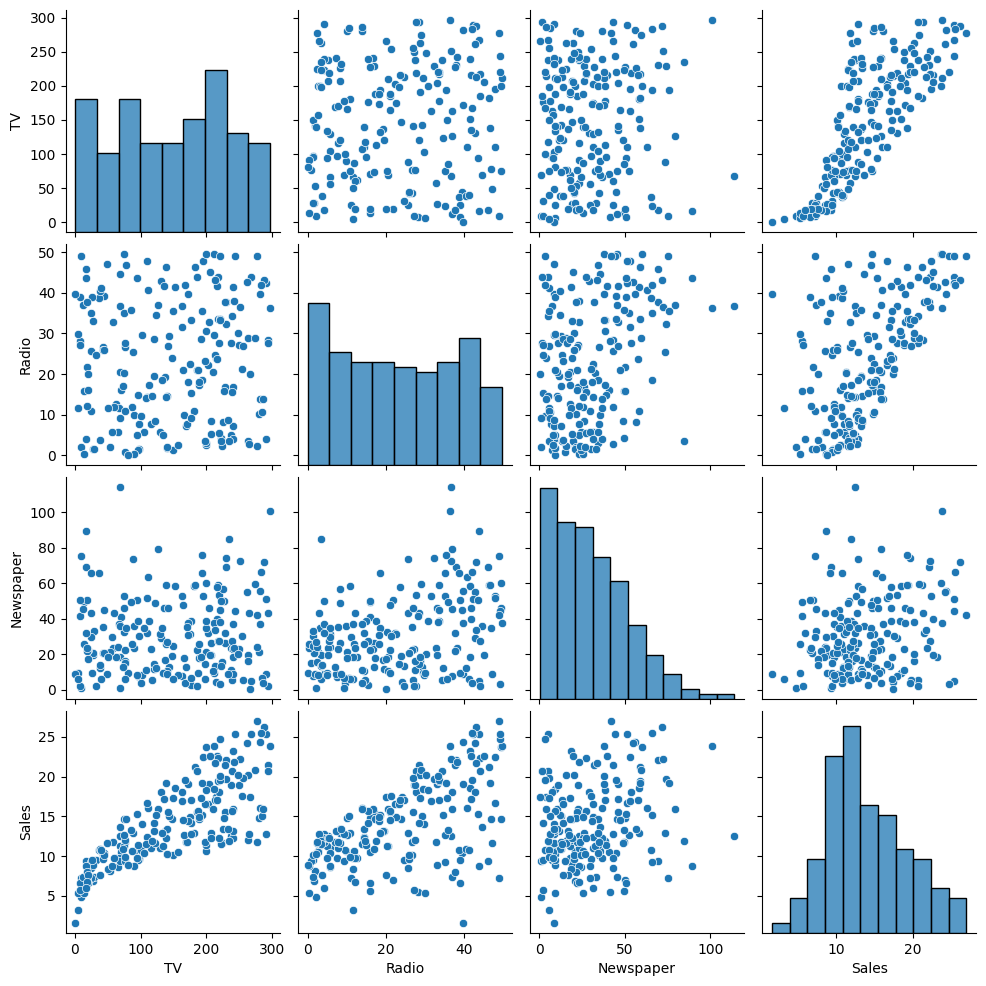

In [ ]:
sns.pairplot(DF)

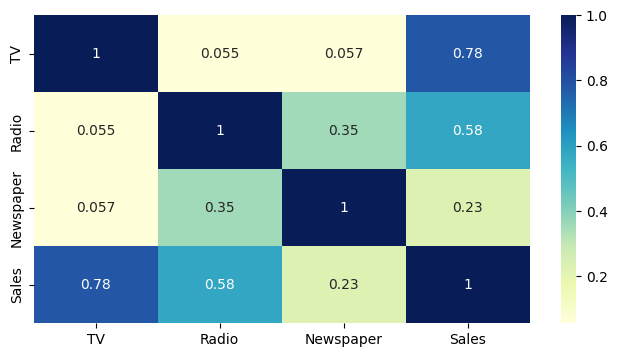

In [ ]:
plt.figure(figsize=(8,4))
corr=DF.corr()
sns.heatmap(data=abs(corr),annot=True,cmap="YlGnBu");

# **Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# **Linear Regression**

In [ ]:

# Split the data into features (X) and target variable (Y)
X = DF.drop('Sales', axis=1)
Y = DF['Sales']

# Create a Linear Regression model
lr_model = LinearRegression()


In [ ]:
# Train the model
lr_model.fit(X, Y)


LinearRegression()

In [ ]:
# Make predictions
Y_pred = lr_model.predict(X)

In [ ]:
# Calculate R-squared score
r2 = r2_score(Y, Y_pred)
print(f"R-squared (R2) score: {r2}")

R-squared (R2) score: 0.8972106381789522


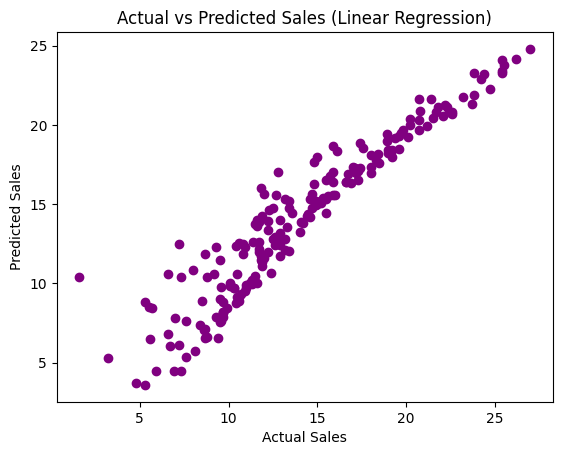

In [ ]:
# Create a scatter plot of actual vs predicted sales
plt.scatter(Y, Y_pred, c='purple')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Linear Regression)')
plt.show()

# **Decision Tree regressor**

In [ ]:
# Split the data into features (X) and target variable (Y)
X = DF.drop('Sales', axis=1)
Y = DF['Sales']

# Create a Decision Tree regressor
dt_model = DecisionTreeRegressor(random_state=42)


In [ ]:

# Train the model
dt_model.fit(X, Y)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Make predictions
Y_pred = dt_model.predict(X)

In [ ]:
# Calculate R-squared score
r2 = r2_score(Y, Y_pred)
print(f"R-squared (R2) score: {r2}")



R-squared (R2) score: 1.0


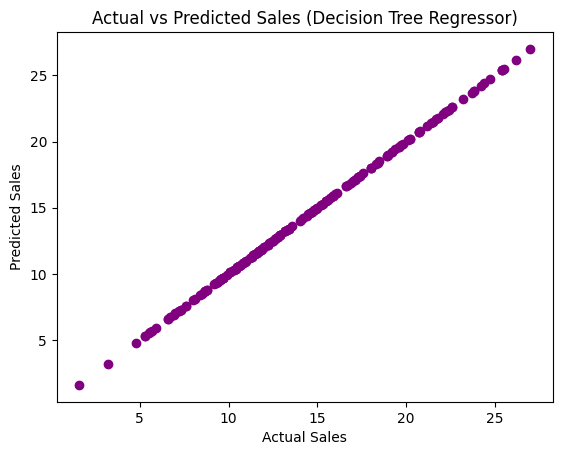

In [ ]:
# Create a scatter plot of actual vs predicted sales
plt.scatter(Y, Y_pred, c='purple')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Decision Tree Regressor)')
plt.show()

# **CONCLUSION**
 the analysis reveals that TV advertising has the highest impact on sales compared to radio and newspaper advertising. Therefore, allocating a larger portion of the advertising budget to TV advertising is recommended. However, it is essential to consider the law of diminishing returns and ensure a balanced approach by integrating multiple advertising channels for optimal results. Further analysis and modeling can be conducted to determine the specific effectiveness of each advertising channel and refine future marketing strategies.